Case Study #3 - Correlation and Regression

1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
dt = pd.read_csv('Add_sales_data_2018.csv')
dt

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683
...,...,...,...,...,...,...,...
200,2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
201,2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
202,2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013
203,2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444


In [5]:
data = dt.rename(columns = {'Add1(in Thousands)':'Ads1', 'Add2(in Thousands)':'Ads2',
                       'Add3(in Thousands)':'Ads3', 'Add4(in Thousands)':'Ads4', 
                       'Add5(in Thousands)':'Ads5','Profit(in Thousands)':'Profit'})
data.head()

,Date,Ads1,Ads2,Ads3,Ads4,Ads5,Profit
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [6]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    205 non-null    object 
 1   Ads1    205 non-null    float64
 2   Ads2    205 non-null    float64
 3   Ads3    205 non-null    float64
 4   Ads4    205 non-null    float64
 5   Ads5    205 non-null    float64
 6   Profit  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [7]:
data.isna().sum()

Date      0
Ads1      0
Ads2      0
Ads3      0
Ads4      0
Ads5      0
Profit    0
dtype: int64

In [10]:
data.describe()

,Ads1,Ads2,Ads3,Ads4,Ads5,Profit
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


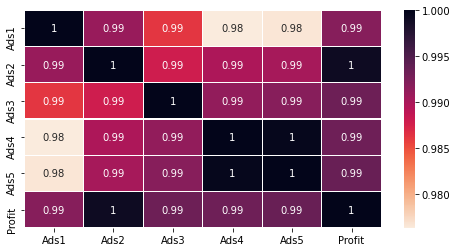

In [12]:
plt.subplots(figsize=(8,4))
sns.heatmap(data=data.corr(), annot=True, linewidths=0.2,cmap='rocket_r')
plt.show()

2. Build a regression model to predict the profit from the given data and comment your findings on it.

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [14]:

data1 = data.loc[:,'Ads1':]
data1.head()

,Ads1,Ads2,Ads3,Ads4,Ads5,Profit
0,208.00,222.25,206.85,216.00,215.15,4093.065
1,217.00,218.60,205.90,210.25,209.20,4042.448
2,223.50,227.80,216.15,217.25,218.20,4213.819
3,230.00,237.50,225.75,226.45,227.60,4391.665
4,234.55,234.60,221.05,230.30,230.90,4350.683


In [15]:
X = data1.drop(columns=['Ads5', 'Profit'], axis=1)
y = data1['Profit']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=65, test_size=90)
data_compare = pd.DataFrame({'Test Profits':y_test})

In [17]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)
print(f'Model slopes are {model.coef_} and model intercept is {model.intercept_}')

Model slopes are [ 0.92922986 12.48056356  3.58403877  1.78688168] and model intercept is -0.33885993769945344


In [18]:
test_pred = model.predict(X_test) 
data_compare['Predicted Profits'] = test_pred 

In [19]:
print(f'MSE for the model is {mean_squared_error(y_test, test_pred)}')

MSE for the model is 0.36492680069176003


In [20]:
data_compare.head()

,Test Profits,Predicted Profits
88,4937.030,4937.768512
56,4947.720,4947.237544
31,4617.695,4617.263795
66,5038.222,5037.949605
12,4464.110,4464.383445


3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement

In [21]:
profit_prediction= pd.DataFrame(columns= X_test.columns)
given_sales = [290,312,309,298]
profit_prediction.loc[0] = given_sales
profit_prediction

,Ads1,Ads2,Ads3,Ads4
0,290,312,309,298


In [29]:
print(model.predict(profit_prediction))

[5803.03235232]


In [ ]:
So the predicted profit generated by the company is 5803.03235232.